# K-Means 군집화 Lab1

1. boston_housing.csv 파일을 읽어서 boston_df를 만드시오.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston_df=pd.read_csv('../../data/boston_housing.csv')

In [5]:
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(boston_df.drop('medv',axis=1))
boston_scaled=scaler.transform(boston_df.drop('medv',axis=1))
boston_scaled_df=pd.DataFrame(data=boston_scaled,columns=boston_df.columns[:-1])

In [4]:
boston_scaled_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [6]:
# boston_scaled_df를 이용해서 7개의 군집들을 K-평균 군집화를 이용해서 만드시오. 군집화 결과를 boston_df에 cluster 컬럼으로 추가하시오.
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=7)
kmeans.fit(boston_scaled_df)
boston_df['cluster']=kmeans.labels_
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,4
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,4
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,4
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,4


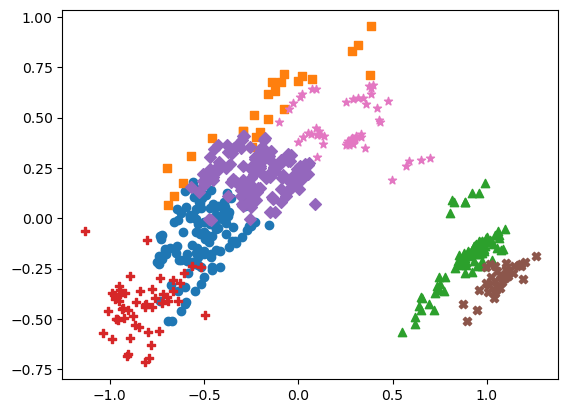

In [7]:
# boston_scaled_df를 2차원으로 축소한 후 축소한 결과를 boston_df에 2개의 컬럼으로 추가하시오. 또한 7개의 군집을 2차원의 그래프로 그리시오.
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(boston_scaled_df)
boston_2d=pca.transform(boston_scaled_df)
boston_df['pca_x']=boston_2d[:,0]
boston_df['pca_y']=boston_2d[:,1]

import matplotlib.pyplot as plt

marker0_ind=boston_df[boston_df['cluster']==0].index
marker1_ind=boston_df[boston_df['cluster']==1].index
marker2_ind=boston_df[boston_df['cluster']==2].index
marker3_ind=boston_df[boston_df['cluster']==3].index
marker4_ind=boston_df[boston_df['cluster']==4].index
marker5_ind=boston_df[boston_df['cluster']==5].index
marker6_ind=boston_df[boston_df['cluster']==6].index

plt.scatter(x=boston_df.loc[marker0_ind,'pca_x'],y=boston_df.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=boston_df.loc[marker1_ind,'pca_x'],y=boston_df.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=boston_df.loc[marker2_ind,'pca_x'],y=boston_df.loc[marker2_ind,'pca_y'],marker='^')
plt.scatter(x=boston_df.loc[marker3_ind,'pca_x'],y=boston_df.loc[marker3_ind,'pca_y'],marker='P')
plt.scatter(x=boston_df.loc[marker4_ind,'pca_x'],y=boston_df.loc[marker4_ind,'pca_y'],marker='D')
plt.scatter(x=boston_df.loc[marker5_ind,'pca_x'],y=boston_df.loc[marker5_ind,'pca_y'],marker='X')
plt.scatter(x=boston_df.loc[marker6_ind,'pca_x'],y=boston_df.loc[marker6_ind,'pca_y'],marker='*')
plt.show()

In [17]:
# 주택가격이 가장 높은 군집이 무엇인지 확인하시오. 또 주택 가격이 가장 낮은 군집이 무엇인지 확인하시오.
boston_df.groupby('cluster')['medv'].median().sort_values(ascending=False)

cluster
3    29.45
1    23.85
0    23.25
4    21.50
6    18.05
2    16.10
5    12.70
Name: medv, dtype: float64

In [18]:
boston_df.groupby('cluster')['medv'].median().sort_values(ascending=True)

cluster
5    12.70
2    16.10
6    18.05
4    21.50
0    23.25
1    23.85
3    29.45
Name: medv, dtype: float64

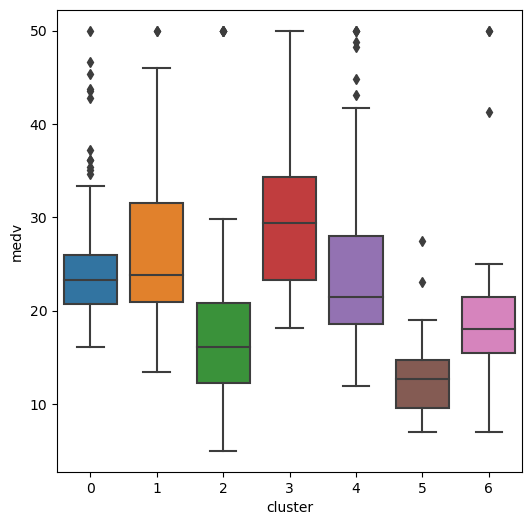

In [ ]:
# 군집별 주택 가격 중간값을 boxplot으로 그리시오.
import seaborn as sns
plt.figure(figsize=(6,6))
g = sns.boxplot(x='cluster',y='medv',data=boston_df)
plt.show()

In [11]:
# 주택가격이 가장 높은 군집의 특징을 설명하시오. describe() 함수를 이용하여 설명하시오.
boston_df[boston_df['cluster']==3].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster,pca_x,pca_y
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.000000
mean,0.040379,71.250000,2.731667,0.018519,0.414874,6.767352,29.455556,7.251494,3.425926,317.370370,16.538889,388.973519,5.803333,29.792593,3.0,-0.834811,-0.431748
std,0.026919,17.602463,1.259152,0.136083,0.019880,0.557510,10.399032,1.780010,1.608959,64.577669,2.155153,11.329366,2.454013,8.286585,0.0,0.137849,0.131848
min,0.009060,35.000000,0.460000,0.000000,0.385000,5.663000,9.900000,3.788600,1.000000,187.000000,12.600000,341.600000,1.980000,18.200000,3.0,-1.132454,-0.716601
25%,0.018938,55.000000,1.690000,0.000000,0.401500,6.400500,21.575000,6.219600,2.000000,258.250000,15.200000,386.747500,4.397500,23.275000,3.0,-0.949234,-0.500831
50%,0.035060,80.000000,2.680000,0.000000,0.411000,6.760500,30.250000,7.308150,4.000000,329.000000,16.250000,393.135000,5.245000,29.450000,3.0,-0.852707,-0.418078
75%,0.047807,81.875000,3.440000,0.000000,0.428000,7.128000,35.850000,8.339200,5.000000,358.000000,17.900000,396.657500,7.025000,34.275000,3.0,-0.743605,-0.365280
max,0.125790,100.000000,5.320000,1.000000,0.484000,8.034000,56.400000,12.126500,6.000000,469.000000,22.000000,396.900000,14.800000,50.000000,3.0,-0.497532,-0.063168


In [16]:
# 주택가격이 가장 낮은 군집의 특징을 설명하시오. describe() 함수를 이용하여 설명하시오.
boston_df[boston_df['cluster']==5].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster,pca_x,pca_y
count,35.000000,35.0,3.500000e+01,35.0,35.000000,35.000000,35.000000,35.000000,35.0,35.0,3.500000e+01,35.000000,35.000000,35.000000,35.0,35.000000,35.000000
mean,16.346086,0.0,1.810000e+01,0.0,0.666829,6.076000,90.125714,1.988334,24.0,666.0,2.020000e+01,55.669714,21.007429,12.900000,5.0,1.069671,-0.301756
std,14.789799,0.0,7.209162e-15,0.0,0.056641,0.691216,9.922474,0.358694,0.0,0.0,7.209162e-15,53.016568,6.139928,4.461996,0.0,0.085079,0.072631
min,3.774980,0.0,1.810000e+01,0.0,0.584000,3.863000,59.700000,1.413000,24.0,666.0,2.020000e+01,0.320000,10.110000,7.000000,5.0,0.873345,-0.510610
25%,8.346355,0.0,1.810000e+01,0.0,0.597000,5.915500,85.600000,1.798300,24.0,666.0,2.020000e+01,13.465000,17.155000,9.550000,5.0,1.019096,-0.342221
50%,11.812300,0.0,1.810000e+01,0.0,0.679000,6.202000,93.300000,1.968200,24.0,666.0,2.020000e+01,35.050000,19.780000,12.700000,5.0,1.068232,-0.292598
75%,15.518750,0.0,1.810000e+01,0.0,0.713000,6.493000,100.000000,2.162550,24.0,666.0,2.020000e+01,92.500000,24.030000,14.700000,5.0,1.112242,-0.239435
max,73.534100,0.0,1.810000e+01,0.0,0.740000,6.852000,100.000000,2.871500,24.0,666.0,2.020000e+01,210.970000,36.980000,27.500000,5.0,1.259115,-0.186123


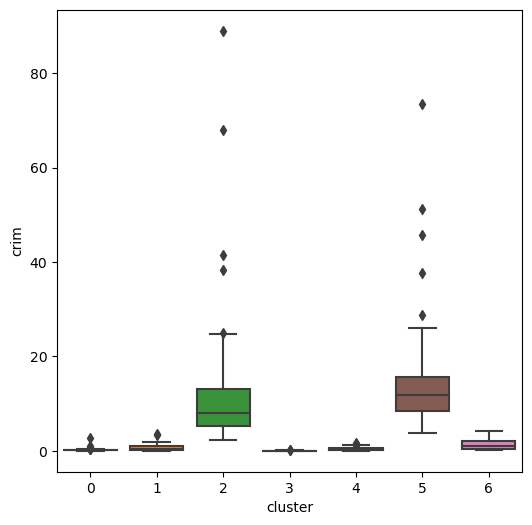

In [15]:
# 군집별 범죄율을 boxplot으로 그리시오.
plt.figure(figsize=(6,6))
g = sns.boxplot(x='cluster',y='crim',data=boston_df)
plt.show()